In [1]:
import pandas as pd # data processing, CSV file I/O
import numpy as np # Linear algebra
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [2]:
tweets = pd.read_csv("C:/Users/Hp/Downloads/Elon_musk.csv",encoding='Latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
# Drop Unnamed from dataset
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [4]:
tweets.isnull().sum()

Text    0
dtype: int64

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [6]:
# Rename text column
tweets = tweets.rename({'Text':'text'},axis=1)
tweets.head()

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


# Data Cleaning and Text Preprocessing

In [7]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [8]:
tweets['text'] = tweets.text.apply(clean)
tweets.text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: text, Length: 1999, dtype: object

In [9]:
tweets = [text.strip() for text in tweets.text] # remove both the leading and the trailing characters
tweets = [text for text in tweets if text] # removes empty strings, because they are considered in Python as False
tweets

['i\x92m an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy  haha thanks',
 'flcnhvy  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'geoffkeighley unrealengine it\x92s getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 'joshmanmode he definitely has issues but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy',
 'this is true power haha',
 'freewalletorg any crypto wallet that won

In [10]:
tweets_text = ' '.join(tweets)
len(tweets_text)

130001

In [12]:
print(tweets_text[0:300])

im an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge
all 


In [13]:
#Tokenization
from nltk.tokenize import word_tokenize
tweets_tokens = word_tokenize(tweets_text)
print(tweets_tokens[0:300])

['i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'givedirectly', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can',

In [14]:
len(tweets_tokens)

19609

In [19]:
# Stopwords
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in tweets_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'keys', '

In [20]:
len(no_stop_tokens)

13414

In [21]:
#Normalize the data
lower_words = [text.lower() for text in no_stop_tokens]
print(lower_words[0:20])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing']


In [22]:
#NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")

In [23]:
# Lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
print(doc[0:50])

im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvy', 'haha', 'thank', 'flcnhvy', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertain', 'outcome', 'likely']


# Feature Extraction
1 Using CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [26]:
print(cv.get_feature_names()[50:100])

['address', 'adlanbogatyryov', 'administer', 'adolfomoreno', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'afloathickory', 'africa', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aiautopilot', 'aim', 'air', 'aircraft', 'airplane', 'ajtourville', 'ak', 'aka', 'akidesir', 'akinfermo', 'alandail', 'alert', 'alertalarm', 'alexander', 'alexandersibert', 'alexavoigt', 'alexebenton', 'alexsvanart', 'algo', 'algorithm', 'aliafshari']


C:\Users\swami\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(tweetscv.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(tweetscv.toarray().shape)

(13419, 3957)


# 2 CountVectorizer with N-grams (Bigrams and Trigrams)

In [29]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=80)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [30]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['ajtourville', 'also', 'amp', 'car', 'cleantechnica', 'come', 'could', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'one', 'people', 'ppathole', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thesheetztweetz', 'think', 'time', 'true', 'use', 'we', 'we re', 'well', 'wholemarsblog', 'work', 'would', 'yeah', 'year', 'yes']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 3 TF-IDF Vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=300)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [33]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['absolutely', 'accurate', 'actually', 'add', 'agree', 'ai', 'ajtourville', 'almost', 'also', 'although', 'amazing', 'amp', 'appreciate', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'back', 'bad', 'bar', 'battery', 'berlin', 'berniesander', 'beta', 'big', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'call', 'can', 'car', 'cargo', 'change', 'cleantechnica', 'close', 'come', 'company', 'complete', 'confirm', 'congratulation', 'cool', 'cost', 'could', 'crew', 'day', 'definitely', 'design', 'different', 'djsnm', 'do', 'doesn', 'dojo', 'don', 'dragon', 'droneship', 'early', 'earth', 'easy', 'electric', 'energy', 'engine', 'engineering', 'engineersfee', 'engineersfeed', 'enough', 'ercxspace', 'erdayastronaut', 'evafoxu', 'even', 'ever', 'exactly', 'fair', 'falcon', 'far', 'fast', 'feel', 'felixschlang', 'fire', 'first', 'fix', 'flap', 'flcnhvy', 'flight', 'fly', 'fsd', 'full', 'fully', 'fun', 'future', 'futurejurvetson', 'game', 'gerberkawasaki', 'get', 'g

In [34]:
clean_tweets=' '.join(lemmas)
clean_tweets

'i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel try joerogan spotify great interview doge underestimate teslacn congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owenspark flcnhvy haha thank flcnhvy indeed tweet definitely represent realworld time allocation entertain outcome likely givedirectly send agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won\x92t give private key avoid cost freewalletorg app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical amp economic e

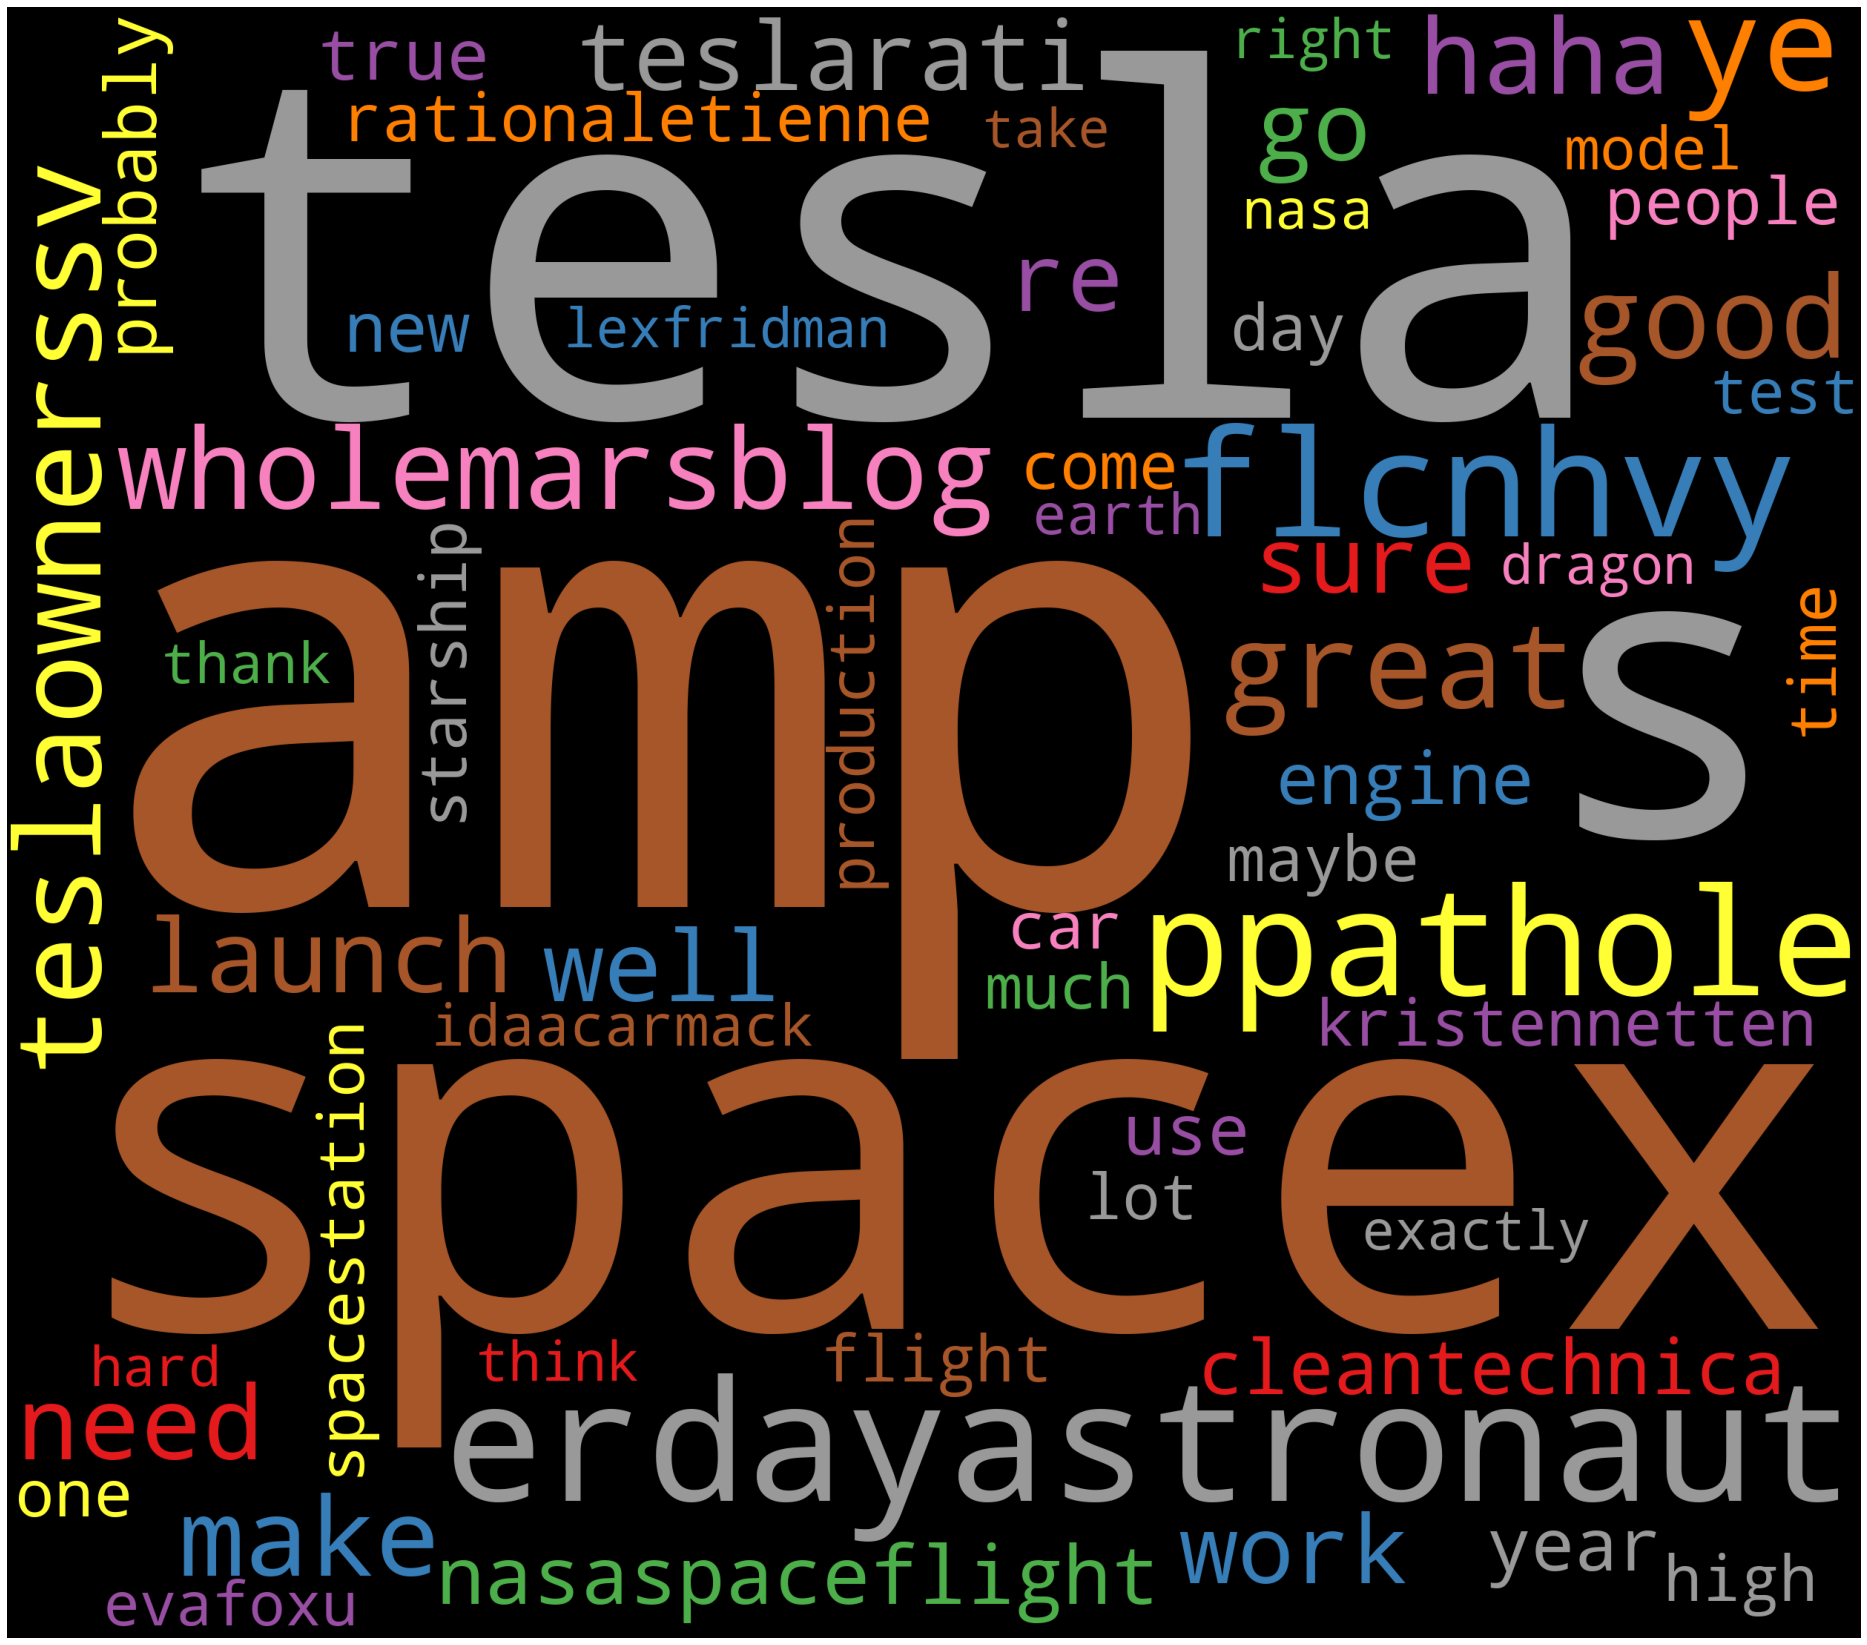

In [35]:
# Generate Word Cloud
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=2500,height=2200,background_color='black',max_words=60,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [36]:
# Named Entity Recognition (NER)
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [38]:
for token in doc_block[200:400]:
    print(token, token.pos_)

seem VERB
bit NOUN
high ADJ
itsallrisky NOUN
doge NOUN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin NOUN
per ADP
unit NOUN
time NOUN
whereas SCONJ
michaelgalanin PROPN
kevinmgill PROPN
wow INTJ
erdayastronaut NOUN
michaelhodapp VERB
orbital ADJ
launch NOUN
tower NOUN
stack VERB
enough ADJ
raptor NOUN
orbit NOUN
booster NOUN
improve VERB
ship NOUN
amp PROPN
booster NOUN
mass NOUN
michaelhodapp VERB
back ADP
work NOUN
tonight NOUN
ð PROPN
ðogecoin VERB
instructional ADJ
video NOUN
httpstcoueeocofctb NOUN
people NOUN
speak VERB
lexfridman NOUN
cute ADJ
univercurious ADJ
extremely ADV
misleading ADJ
image NOUN
doesnt NOUN
reflect VERB
true ADJ
time NOUN
cost NOUN
people NOUN
rain NOUN
amp PROPN
pain NOUN
let VERB
doge PROPN
hodl ADJ
rainforest NOUN
its PROPN
finally ADV
come VERB
itsallrisky ADJ
its PROPN
fun NOUN
crypto PROPN
joshroomsburg PROPN
snoopdogg PROPN
genesimmon PROPN
simplicity NOUN
genius NOUN
astrogdogg NOUN
spacex VERB
yup INTJ
jbuttermost PROPN
dogecoinric

In [39]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[200:400])

['raptor', 'mu', 'nasaspaceflight', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'deck', 'darudevil', 'spacex', 'default', 'engine', 'lever', 'arm', 'shut', 'erdayastronaut', 'spacex', 'engine', 'point', 'risk', 'adamklotz', 'erdayastronaut', 'erdayastronaut', 'start', 'engine', 'amp', 'shut', 'need', 'land', 'become', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'madoverlord', 'time', 'pull', 'lowkey', 'highs', 'need', 'dogecoin', 'crypto', 'welcome', 'outcome', 'amp', 'wind', 'rt', 'watch', 'starlink', 'satellite', 'twitter', 'progress', 'hamoon', 'neuralink', 'neuralink', 'work', 'ensure', 'safety', 'amp', 'communication', 'mission', 'access', 'people', 'dream', 'go', 'space', 'announce', 'astronaut', 'mission', 'orbit', 'earth', 'dragon', 'work', 'advanced', 'phone', 'robot', 'skill', 'need', 'neuralink', 'feel', 'make', 'version', 'cyberpunk', 'come', 'consider', 'work', 'neuralink', 'shortterm', 'solve', 'brainspine', 'injury', 'lon

In [40]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] 

,word,count
0,tesla,137
1,amp,86
2,make,64
3,erdayastronaut,56
4,teslaownerssv,52
5,spacex,50
6,go,47
7,teslarati,46
8,year,45
9,launch,44


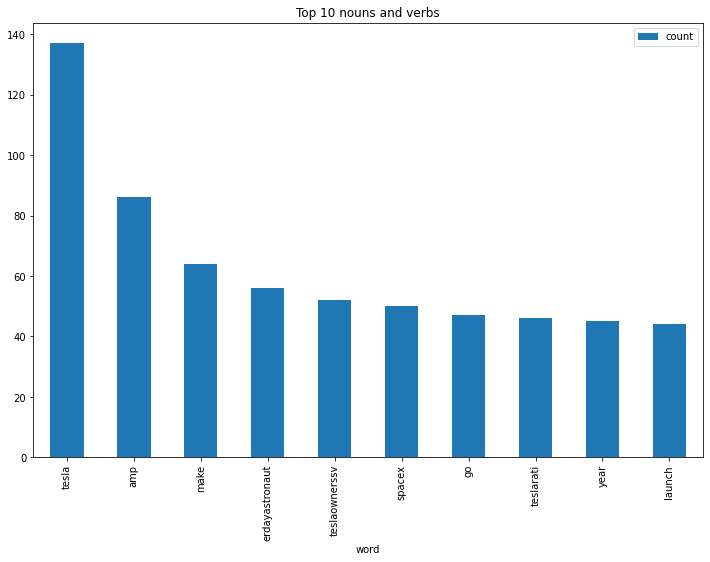

In [41]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');


# Emotion Mining - Sentiment Analysis

In [42]:
tweets = pd.read_csv("C:/Users/Hp/Downloads/Elon_musk.csv",encoding='Latin-1')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets = tweets.rename({'Text': 'text'}, axis=1)

In [43]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [44]:
tweets['text'] = tweets.text.apply(clean)

In [45]:
tweets = [text.strip() for text in tweets.text] 
tweets = [text for text in tweets if text] 
tweets

['i\x92m an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy  haha thanks',
 'flcnhvy  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'geoffkeighley unrealengine it\x92s getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 'joshmanmode he definitely has issues but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy',
 'this is true power haha',
 'freewalletorg any crypto wallet that won

In [46]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(tweets))
sentences

['i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costs freewalletor

In [47]:
sent_df = pd.DataFrame(tweets,columns=['sentence'])
sent_df

,sentence
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1969,flcnhvy true it sounds so surreal but the nega...
1970,ppathole make sure to read ur terms amp condit...
1971,teslagong ppathole samwise gamgee
1972,ppathole altho dumb and dumber is


In [49]:
affin = pd.read_csv('C:/Users/Hp/Downloads/Afinn.csv', sep=',', encoding='latin-1')

In [50]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [51]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [52]:
#manual testing
calculate_sentiment(text='great')

3

In [53]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       3
3      -1
4       6
       ..
1969   -3
1970    1
1971    0
1972   -3
1973    2
Name: sentiment_value, Length: 1974, dtype: int64

In [54]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value
182,naval also the road to hell is mostly paved w...,-7
1695,neuroskeptic they dont fire all at once some ...,-6
1259,tjlk there are some eerie parallels between th...,-6
1554,universalsci asteroid impact risk is well unde...,-5
1514,ppathole the early investor part of tesla is...,-5
...,...,...
462,picotjohn cyberpunkgame its a good to great g...,10
1158,thanks tesla team for great work on deliveries...,10
452,teslaownerssv it will get absurdly good tesla ...,10
1289,one way or another excitement guaranteed suppo...,11


In [55]:
#Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1974.000000
mean        0.740122
std         1.826715
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [56]:
#negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,im an alien,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0
3,doge is underestimated,-1
6,frodo was the underdoge\nall thought he would ...,-2
8,flcnhvy indeed tweets definitely do not repre...,0
...,...,...
1967,ai symbiosis while u wait,0
1968,flcnhvy theres some of that too,0
1969,flcnhvy true it sounds so surreal but the nega...,-3
1971,teslagong ppathole samwise gamgee,0


In [57]:
#positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value
2,joerogan spotify great interview,3
4,teslacn congratulations tesla china for amazin...,6
5,happy new year of the ox,3
7,owensparks flcnhvy haha thanks,5
9,the most entertaining outcome is the most likely,2
...,...,...
1962,ppathole ihearttesla for sure this is both gre...,3
1963,redmercy yes,1
1964,buzzindelhi sorry should hopefully be soon,1
1970,ppathole make sure to read ur terms amp condit...,1


In [58]:
#Adding index coloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,im an alien,0,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0,1
2,joerogan spotify great interview,3,2
3,doge is underestimated,-1,3
4,teslacn congratulations tesla china for amazin...,6,4
...,...,...,...
1969,flcnhvy true it sounds so surreal but the nega...,-3,1969
1970,ppathole make sure to read ur terms amp condit...,1,1970
1971,teslagong ppathole samwise gamgee,0,1971
1972,ppathole altho dumb and dumber is,-3,1972


C:\Users\swami\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

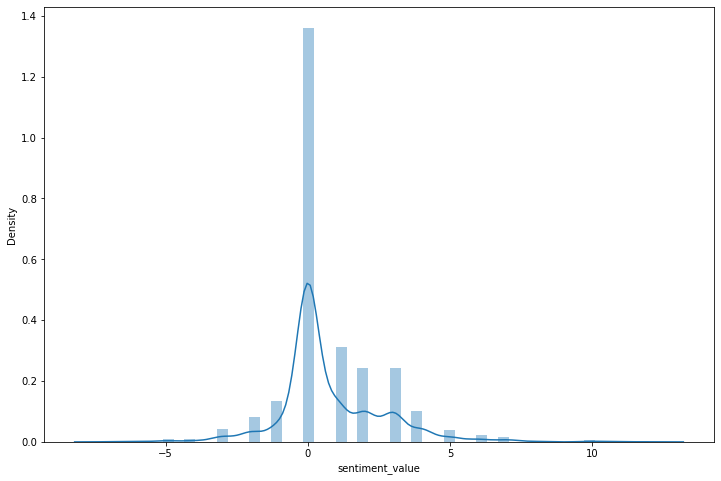

In [59]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(12,8))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

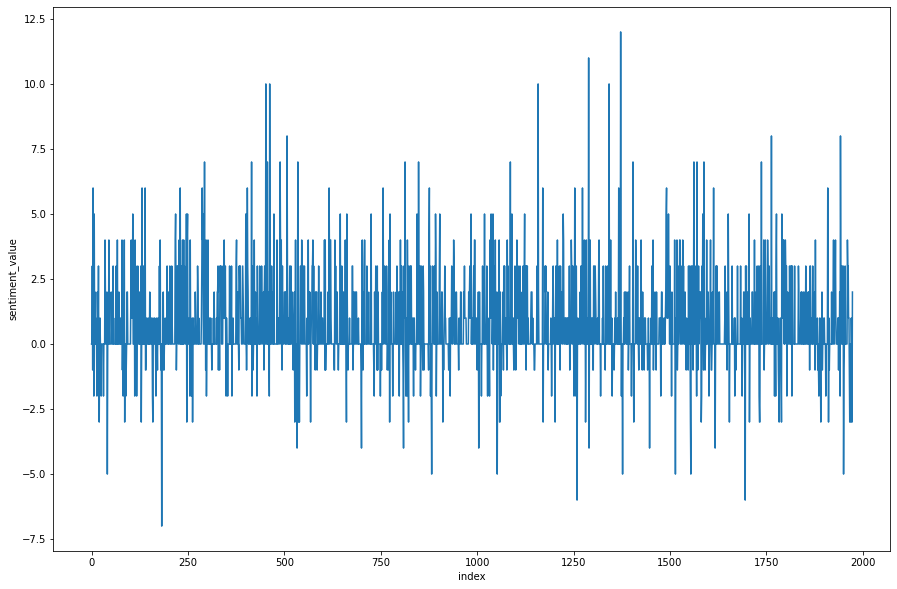

In [60]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)